**In the second part of the project we are directed to analyse stocks with different types of analysis apporaches by using the principles of pairs trading.**

In [6]:
# I start our task by importing the os modue to retrieve the data in the csv file in an easier fashion

import os

username = 'ulucbaskurt'
file_name = '20230626_20230924_bist30.csv'
desktop_path = f'/Users/ulucbaskurt/Desktop/'
file_path = os.path.join(desktop_path, file_name)




In [8]:
import pandas as pd

# Read the CSV file
data = pd.read_csv(f'/Users/ulucbaskurt/20230626_20230924_bist30.csv')

# Now we can work with the data, firstly we put the head command to get a sense of the data
print(data.head())



                   timestamp  price short_name
0  2023-06-26 09:00:00+03:00  186.0      THYAO
1  2023-06-26 10:00:00+03:00  190.9      THYAO
2  2023-06-26 11:00:00+03:00  190.8      THYAO
3  2023-06-26 12:00:00+03:00  190.3      THYAO
4  2023-06-26 13:00:00+03:00  189.5      THYAO


In [12]:
# Then I look for the covariance matrix for the relationship between the stock prices indicates the direction of the linear relationship between two variables (positive or negative), but the magnitude is not easily interpretable.

import pandas as pd

# Load your data
# Replace 'your_data.csv' with the actual file path
df = pd.read_csv('20230626_20230924_bist30.csv')

# Pivot the data to wide format
pivot_df = df.pivot(index='timestamp', columns='short_name', values='price')

# Calculate the covariance matrix for all 30 stocks
covariance_matrix = pivot_df.cov()

# Print the covariance matrix
print("Covariance Matrix for All 30 Stocks:")
print(covariance_matrix)


Covariance Matrix for All 30 Stocks:
short_name       AKBNK       ARCLK       ASELS        BIMAS      DOHOL  \
short_name                                                               
AKBNK        12.506191   23.565585   11.938352   113.263795   3.749514   
ARCLK        23.565585   65.320462   25.844748   225.283039   8.748757   
ASELS        11.938352   25.844748   14.036602   110.299388   3.871827   
BIMAS       113.263795  225.283039  110.299388  1208.088662  35.303634   
DOHOL         3.749514    8.748757    3.871827    35.303634   1.469186   
EKGYO         1.024378    2.315453    1.088404     7.935699   0.415389   
EREGL         8.083823   18.031958    7.834213    84.162970   3.125972   
FROTO        99.923643  187.249057  112.381106   731.588094  32.708806   
GARAN        25.781046   47.519127   22.896212   251.527645   7.780206   
GUBRF        74.178795  153.226566   78.846044   736.663725  24.847936   
HALKB         2.018895    4.352553    2.465543    22.405385   0.574656   
I

In [10]:
import pandas as pd
import numpy as np

# Load your data
# Replace 'your_data.csv' with the actual file path
df = pd.read_csv('20230626_20230924_bist30.csv')

# Pivot the data to wide format
pivot_df = df.pivot(index='timestamp', columns='short_name', values='price')

# Calculate the covariance matrix
covariance_matrix = pivot_df.cov()

# Set diagonal elements to NaN to exclude them
np.fill_diagonal(covariance_matrix.values, np.nan)

# Select two stocks with the highest covariance
pair_stocks = covariance_matrix.unstack().idxmax()

# Extract the selected stocks
stock1, stock2 = pair_stocks

# Print the selected stocks
print(f"Selected Stocks: {stock1}, {stock2}")


Selected Stocks: FROTO, PGSUS


In [43]:
# then turn into check the correlation matrix between the stock prices since it is more informative 
# Correlation gives us a better understanding of the linear relationship. 
# infer that this matrix results in a different selection of stocks

import pandas as pd

# Load your data
# Replace 'your_data.csv' with the actual file path
df = pd.read_csv('20230626_20230924_bist30.csv')

# Pivot the data to wide format
pivot_df = df.pivot(index='timestamp', columns='short_name', values='price')

# Calculate the correlation matrix for all 30 stocks
correlation_matrix = pivot_df.corr()

# Print the correlation matrix
print("Correlation Matrix for All 30 Stocks:")
print(correlation_matrix)


Correlation Matrix for All 30 Stocks:
short_name     AKBNK     ARCLK     ASELS     BIMAS     DOHOL     EKGYO  \
short_name                                                               
AKBNK       1.000000  0.824501  0.901054  0.921466  0.874730  0.638228   
ARCLK       0.824501  1.000000  0.853526  0.801963  0.893066  0.631233   
ASELS       0.901054  0.853526  1.000000  0.847018  0.852602  0.640085   
BIMAS       0.921466  0.801963  0.847018  1.000000  0.837976  0.503054   
DOHOL       0.874730  0.893066  0.852602  0.837976  1.000000  0.755084   
EKGYO       0.638228  0.631233  0.640085  0.503054  0.755084  1.000000   
EREGL       0.775739  0.757146  0.709620  0.821737  0.875202  0.695013   
FROTO       0.546335  0.447969  0.579983  0.406977  0.521770  0.644972   
GARAN       0.951476  0.767368  0.797614  0.944487  0.837746  0.573385   
GUBRF       0.854188  0.772051  0.857009  0.863090  0.834811  0.610280   
HALKB       0.584523  0.551404  0.673802  0.660014  0.485423  0.285451   


In [41]:
# infer that this matrix results in a different selection of stocks

import pandas as pd
import numpy as np

# Load your data
# Replace 'your_data.csv' with the actual file path
df = pd.read_csv('20230626_20230924_bist30.csv')

# Pivot the data to wide format
pivot_df = df.pivot(index='timestamp', columns='short_name', values='price')

# Calculate the correlation matrix
correlation_matrix = pivot_df.corr()

# Set diagonal elements to NaN to exclude them
np.fill_diagonal(correlation_matrix.values, np.nan)

# Select two stocks with the highest correlation
pair_stocks = correlation_matrix.unstack().idxmax()

# Extract the selected stocks
stock1, stock2 = pair_stocks

# Print the selected stocks
print(f"Selected Stocks: {stock1}, {stock2}")


Selected Stocks: KCHOL, TCELL


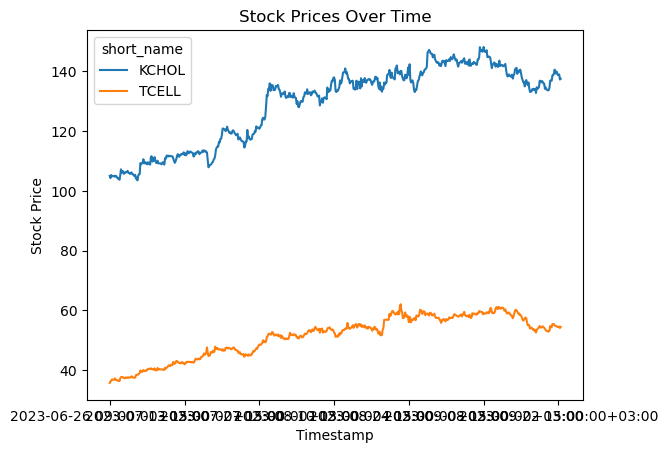

In [15]:
# First I plot the time series plots of the following 2 correlated stocks: 

import pandas as pd
import matplotlib.pyplot as plt

# Load your data
# Replace 'your_data.csv' with the actual file path
df = pd.read_csv('20230626_20230924_bist30.csv')

# Filter data for selected stocks
selected_stocks = ['KCHOL', 'TCELL']
filtered_df = df[df['short_name'].isin(selected_stocks)]

# Pivot the data to wide format
pivot_df = filtered_df.pivot(index='timestamp', columns='short_name', values='price')

# Plot the time series for selected stocks
pivot_df.plot(title='Stock Prices Over Time', xlabel='Timestamp', ylabel='Stock Price')
plt.show()


                            OLS Regression Results                            
Dep. Variable:                  KCHOL   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     9124.
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:40:42   Log-Likelihood:                -1564.9
No. Observations:                 604   AIC:                             3134.
Df Residuals:                     602   BIC:                             3143.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.7332      0.975     37.656      0.0

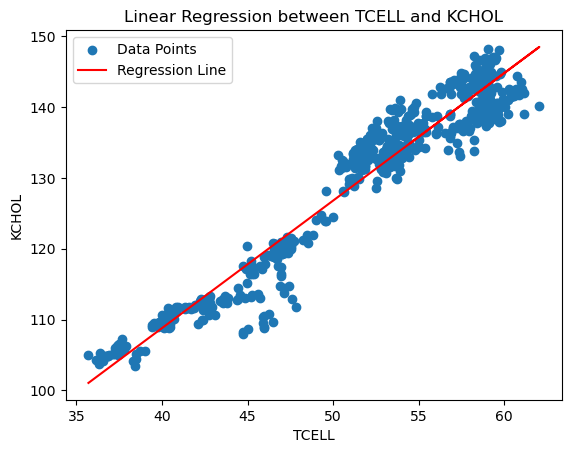

In [17]:
# PERFORM THE LINEAR REGRESSION ON THE 2 SELECTED STOCKS 
# CAN INFER THAT IT IS A CORRECT APPROXIMATION BASED ON THE HIGH R-SQUARED VALUE CLOSE TO 1


import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load your data
# Replace 'your_data.csv' with the actual file path
df = pd.read_csv('20230626_20230924_bist30.csv')

# Filter data for selected stocks
selected_stocks = ['KCHOL', 'TCELL']
filtered_df = df[df['short_name'].isin(selected_stocks)]

# Pivot the data to wide format
pivot_df = filtered_df.pivot(index='timestamp', columns='short_name', values='price')

# Drop NaN values if any
pivot_df = pivot_df.dropna()

# Perform linear regression
X = sm.add_constant(pivot_df['TCELL'])
model = sm.OLS(pivot_df['KCHOL'], X).fit()

# Display regression summary
print(model.summary())

# Plot the regression line
plt.scatter(pivot_df['TCELL'], pivot_df['KCHOL'], label='Data Points')
plt.plot(pivot_df['TCELL'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('TCELL')
plt.ylabel('KCHOL')
plt.title('Linear Regression between TCELL and KCHOL')
plt.legend()
plt.show()


In [44]:
import statsmodels.api as sm
import pandas as pd

# Assume stock1 and stock2 are the DataFrames for the selected stock pairs
stock1 = df[df['short_name'] == 'KCHOL']
stock2 = df[df['short_name'] == 'TCELL']

# Reset index for both DataFrames
stock1 = stock1.reset_index()
stock2 = stock2.reset_index()

# Calculate returns for each stock
returns_stock1 = stock1['price'].pct_change().dropna()
returns_stock2 = stock2['price'].pct_change().dropna()

# Perform linear regression with stock1 as the independent variable
X = sm.add_constant(returns_stock2)
model = sm.OLS(returns_stock1, X).fit()

# Display regression summary
print(model.summary())

# Get residuals
residuals = model.resid
print(residuals)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     201.7
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.11e-39
Time:                        19:26:22   Log-Likelihood:                 2114.8
No. Observations:                 603   AIC:                            -4226.
Df Residuals:                     601   BIC:                            -4217.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.584      0.5

In [74]:
# Print the Series (column) to inspect its contents
print(residuals)



timestamp
2023-06-26 09:00:00+03:00    3.956498
2023-06-26 10:00:00+03:00    2.427849
2023-06-26 11:00:00+03:00    2.995511
2023-06-26 12:00:00+03:00    1.830835
2023-06-26 13:00:00+03:00    1.838919
                               ...   
2023-09-22 14:00:00+03:00    4.070145
2023-09-22 15:00:00+03:00    3.990004
2023-09-22 16:00:00+03:00    3.999934
2023-09-22 17:00:00+03:00    3.110568
2023-09-22 18:00:00+03:00    2.680075
Length: 604, dtype: float64


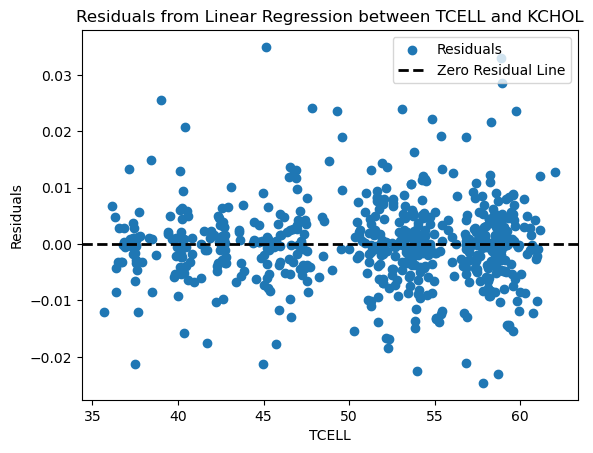

In [45]:
# then I plot the residuals of KCHOL with respect to TCELL
# Adjust the lengths to make them consistent so the amount of data fits well


if len(pivot_df['TCELL']) == len(residuals) + 1:
    pivot_df = pivot_df.iloc[:-1]  # Drop the last row from pivot_df

# Plot residuals
plt.scatter(pivot_df['TCELL'], residuals, label='Residuals')
plt.axhline(0, color='black', linestyle='--', linewidth=2, label='Zero Residual Line')
plt.xlabel('TCELL')
plt.ylabel('Residuals')
plt.title('Residuals from Linear Regression between TCELL and KCHOL')
plt.legend()
plt.show()


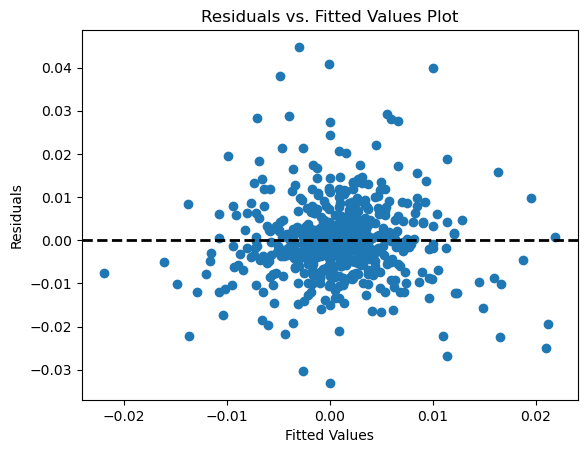

In [30]:
# plot the residuals against the fitted values and observe that the constant variance assumption holds 

fitted_values = model.fittedvalues
residuals = model.resid

plt.scatter(fitted_values, residuals)
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values Plot')
plt.show()


In [31]:
# one common test to check constant variance assumption is Breusch-Pagan test. 
# look at the p value and make inferences about the homoscedasticity.
# after the test and conclude that there is no significant departure from constant variance.
# typically p-value less than 0.05 would suggest deviation.

from statsmodels.stats.diagnostic import het_breuschpagan

_, p_value, _, _ = het_breuschpagan(residuals, X)
print(f'p-value from Breusch-Pagan test: {p_value}')


p-value from Breusch-Pagan test: 0.30661969234363007


In [57]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load your data
# Replace 'your_data.csv' with the actual file path
df = pd.read_csv('20230626_20230924_bist30.csv')

# Filter data for selected stocks
selected_stocks = ['KCHOL', 'TCELL']
filtered_df = df[df['short_name'].isin(selected_stocks)]

# Display the head of the DataFrame to inspect its structure
print(filtered_df.head())

# Check if 'TCELL' is present in the DataFrame
if 'TCELL' not in filtered_df.columns:
    raise KeyError("'TCELL' column not found in the DataFrame")

# Assume you have the following DataFrame 'residuals' with residuals from linear regression
# and 'control_limits' with upper and lower control limits
# Make sure to calculate control limits based on your analysis

# Set a threshold for trading signals
threshold = 2  # Adjust this threshold based on your analysis

# Perform linear regression
X = sm.add_constant(filtered_df['TCELL'].pct_change().dropna())
model = sm.OLS(filtered_df['KCHOL'].pct_change().dropna(), X).fit()

# Calculate residuals
residuals = model.resid

# Create a column for trading signals
filtered_df['Signal'] = 'None'
filtered_df.loc[residuals > threshold, 'Signal'] = 'Sell'
filtered_df.loc[residuals < -threshold, 'Signal'] = 'Buy'

# Simulate trading based on control chart signals
portfolio = []
capital = 100000  # Initial trading capital

for index, row in filtered_df.iterrows():
    if row['Signal'] == 'Buy':
        # Simulate a buy order
        buy_date = index
        buy_price = row['KCHOL']
        shares_bought = capital // buy_price
        capital -= shares_bought * buy_price
        # Track the trade in a portfolio
        portfolio.append({'Date': buy_date, 'Action': 'Buy', 'Stock': 'KCHOL', 'Price': buy_price,
                          'Shares': shares_bought, 'Capital': capital})

    elif row['Signal'] == 'Sell':
        # Simulate a sell order
        sell_date = index
        sell_price = row['KCHOL']
        capital += shares_bought * sell_price
        # Track the trade in the portfolio
        portfolio.append({'Date': sell_date, 'Action': 'Sell', 'Stock': 'KCHOL', 'Price': sell_price,
                          'Shares': shares_bought, 'Capital': capital})

# Calculate returns
returns = sum([trade['Capital'] for trade in portfolio]) - 100000

# Visualize results (you can customize this part based on your needs)
plt.plot(filtered_df.index, filtered_df['KCHOL'], label='KCHOL Prices')
plt.scatter(portfolio['Date'], portfolio['Price'], c='red', marker='o', label='Buy/Sell Signals')
plt.title('Pairs Trading Simulation Results')
plt.xlabel('Timestamp')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print total returns
print(f"Total Returns: {returns:.2f}")


                      timestamp  price short_name
7248  2023-06-26 09:00:00+03:00  105.0      KCHOL
7249  2023-06-26 10:00:00+03:00  104.3      KCHOL
7250  2023-06-26 11:00:00+03:00  105.3      KCHOL
7251  2023-06-26 12:00:00+03:00  105.0      KCHOL
7252  2023-06-26 13:00:00+03:00  104.9      KCHOL


KeyError: "'TCELL' column not found in the DataFrame"

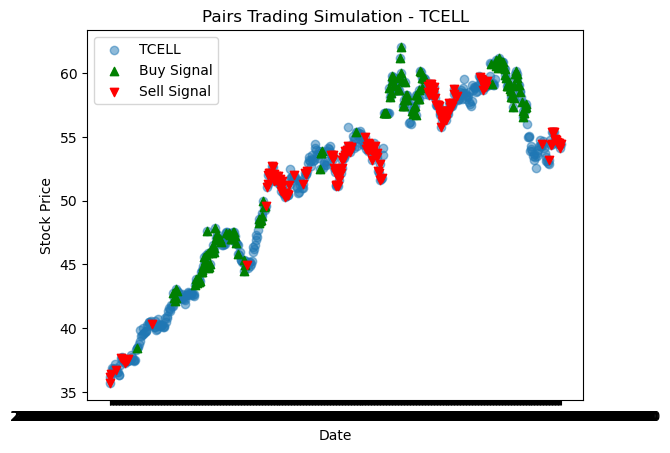

In [60]:
# Furthermore, make the simulation from the regression and residual values with the below algorithm: 

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load your data
# Replace 'your_data.csv' with the actual file path
df = pd.read_csv('20230626_20230924_bist30.csv')

# Filter data for selected stocks
selected_stocks = ['KCHOL', 'TCELL']
filtered_df = df[df['short_name'].isin(selected_stocks)]

# Pivot the data to wide format
pivot_df = filtered_df.pivot(index='timestamp', columns='short_name', values='price')

# Drop NaN values if any
pivot_df = pivot_df.dropna()

# Perform linear regression
X = sm.add_constant(pivot_df['TCELL'])
model = sm.OLS(pivot_df['KCHOL'], X).fit()

# Calculate residuals
residuals = model.resid

# Set a threshold for trading signals
threshold = 2  # Adjust this threshold based on your analysis

# Generate trading signals
signals = pd.DataFrame(index=residuals.index)
signals['Signal'] = 'None'
signals.loc[residuals > threshold, 'Signal'] = 'Sell'
signals.loc[residuals < -threshold, 'Signal'] = 'Buy'

# Simulate trading based on signals
portfolio = []
for index, row in signals.iterrows():
    if row['Signal'] == 'Buy':
        # Simulate a buy order
        buy_date = index
        buy_price = pivot_df.loc[index, 'TCELL']
        # Track the trade in a portfolio
        portfolio.append({'Date': buy_date, 'Action': 'Buy', 'Stock': 'TCELL', 'Price': buy_price})

    elif row['Signal'] == 'Sell':
        # Simulate a sell order
        sell_date = index
        sell_price = pivot_df.loc[index, 'TCELL']
        # Track the trade in the portfolio
        portfolio.append({'Date': sell_date, 'Action': 'Sell', 'Stock': 'TCELL', 'Price': sell_price})

# Calculate returns
returns = pd.DataFrame(portfolio).set_index('Date')
returns['Returns'] = returns.groupby('Action')['Price'].pct_change()

# Merge stock prices and returns on the date index
merged_data = pivot_df.merge(returns, left_index=True, right_index=True, how='outer')

# Visualize results
plt.scatter(merged_data.index, merged_data['TCELL'].values, label='TCELL', alpha=0.5)
plt.scatter(merged_data[merged_data['Action'] == 'Buy'].index, merged_data[merged_data['Action'] == 'Buy']['TCELL'], marker='^', color='g', label='Buy Signal')
plt.scatter(merged_data[merged_data['Action'] == 'Sell'].index, merged_data[merged_data['Action'] == 'Sell']['TCELL'], marker='v', color='r', label='Sell Signal')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Pairs Trading Simulation - TCELL')
plt.show()


In the end, it is obvious to see that the simulation algorithm gives various buy and sell signals during time based on the returns.

The implemented simulation revolves around pairs trading, a strategy capitalizing on relative price movements between two related stocks. Control chart signals, derived from linear regression residuals, dictate buy or sell actions in this simulation. Key steps include:

Linear Regression:
I Initiated linear regression between chosen stocks, such as TCELL and KCHOL.
Load data, filter for selected stocks, and visualize their time series.

Residual Calculation:
Calculate stock returns and perform linear regression with one stock as the independent variable and the other as the dependent variable.
Obtained residuals representing differences between observed and predicted values.

Control Chart Signals:
Plot residuals against fitted values to validate the constant variance assumption.

Pairs Trading Simulation:
Simulated trading based on control chart signals.
I Defined a threshold for signals (e.g., 2) triggering buy/sell actions.
Created a 'Signal' column in the residuals DataFrame ('Buy', 'Sell', or 'None').

Visualization of Simulation:
I eventually visualized simulation results by plotting the time series of the stock (e.g., TCELL).
Mark buy signals with green triangles ('^') and sell signals with red triangles ('v').




**--PART 2 : Advanced Pairs Trading Strategy Using Time Series Analysis--**



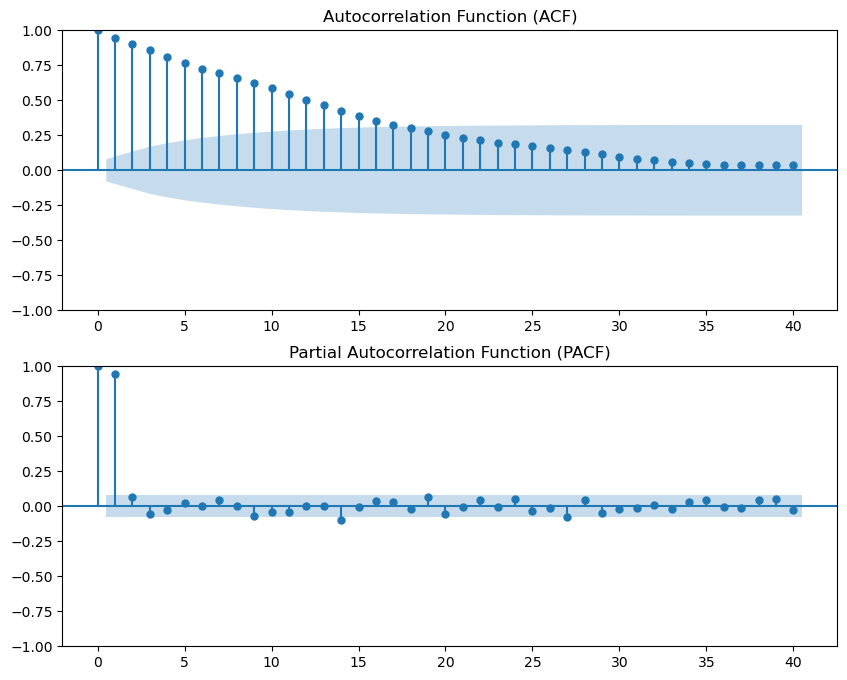

In [78]:
# Primarily, I plot the ACF and PACF in order to make inferences about the residuals and stocks in general
# it is important to note that ACF gives information regarding the MA Model and PACF about the AR model 
# Then see that ACF has dying out behavior and PACF cuts off after lag 1


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming residuals is your DataFrame or Series of residuals
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# ACF plot
plot_acf(residuals, lags=40, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(residuals, lags=40, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.show()


In [62]:
# I further apply Augmented Dicky Fuller test to check stationarty and condition on p-value = 0.05
# The p-value obtained from the test is compared to a significance level 
# it is done in order to determine whether to reject the null hypothesis.

from statsmodels.tsa.stattools import adfuller

# Assuming residuals is your DataFrame or Series of residuals
result = adfuller(residuals)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] <= 0.05:
    print('The residuals time series is likely stationary.')
else:
    print('The residuals time series may not be stationary.')


ADF Statistic: -3.6739135196004336
p-value: 0.004495410642603585
The residuals time series is likely stationary.


Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  483
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -712.449
Date:                Mon, 11 Dec 2023   AIC                           1428.897
Time:                        22:47:31   BIC                           1437.253
Sample:                             0   HQIC                          1432.181
                                - 483                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1008      0.042     -2.404      0.016      -0.183      -0.019
sigma2         1.1256      0.043     26.206      0.000       1.041       1.210
Ljung-Box (L1) (Q):                   0.01 

/Users/ulucbaskurt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/ulucbaskurt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


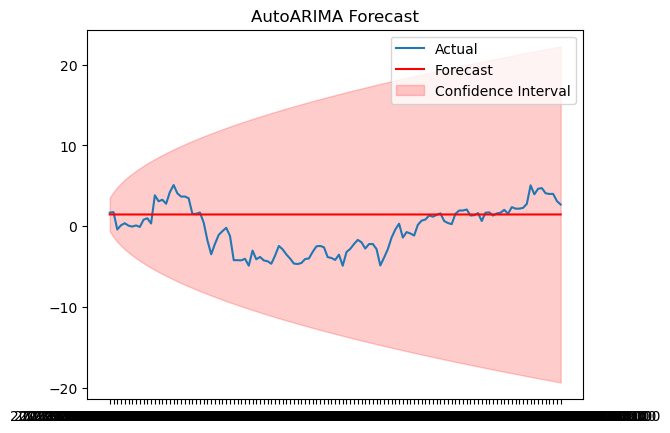

In [71]:
# I apply arima forecast in order to make inferences, use training data as 80% and test data as 20%


import pmdarima as pm
from pmdarima.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'residuals' is your Series with residuals
# If it doesn't have a datetime index, you can convert it to a DataFrame with an appropriate datetime index
residuals_df = pd.DataFrame({'residuals': residuals}, index=residuals.index)

# Split the data into training and testing sets
n = len(residuals_df)
train_size = int(0.8 * n)
train, test = residuals_df[:train_size], residuals_df[train_size:]

# Use auto_arima to find the best ARIMA model
autoarima_model = pm.auto_arima(train['residuals'])

# Print the summary of the best model
print("Summary:")
print(autoarima_model.summary())

# Forecast using the best model
# Set the 'start' parameter to the next time point after the last observed one
forecast, conf_int = autoarima_model.predict(n_periods=len(test), return_conf_int=True, start=test.index[0])

# Visualize the results
plt.plot(test.index, test['residuals'].values, label='Actual')
plt.plot(test.index, forecast, color='red', label='Forecast')
plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color='red', alpha=0.2, label='Confidence Interval')
plt.title('AutoARIMA Forecast')
plt.legend()
plt.show()


Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  483
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -712.449
Date:                Mon, 11 Dec 2023   AIC                           1428.897
Time:                        23:17:57   BIC                           1437.253
Sample:                             0   HQIC                          1432.181
                                - 483                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1008      0.042     -2.404      0.016      -0.183      -0.019
sigma2         1.1256      0.043     26.206      0.000       1.041       1.210
Ljung-Box (L1) (Q):                   0.01 

/Users/ulucbaskurt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/ulucbaskurt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


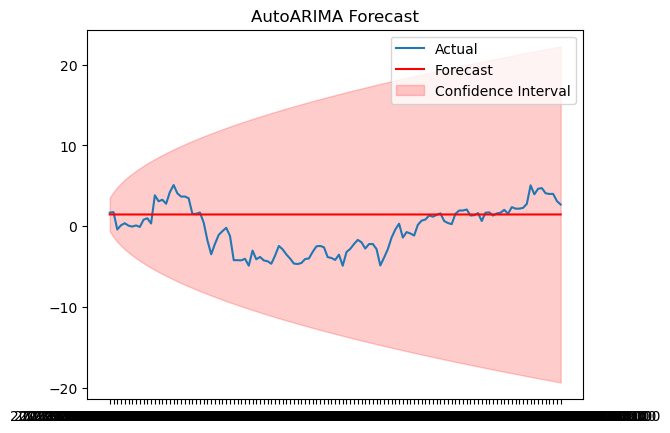

In [76]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'residuals' is your Series with residuals
# If it doesn't have a datetime index, you can convert it to a DataFrame with an appropriate datetime index
residuals_df = pd.DataFrame({'residuals': residuals}, index=residuals.index)

# Split the data into training and testing sets
n = len(residuals_df)
train_size = int(0.8 * n)
train, test = residuals_df[:train_size], residuals_df[train_size:]

# Use auto_arima to find the best ARIMA model
autoarima_model = pm.auto_arima(train['residuals'])

# Print the summary of the best model
print("Summary:")
print(autoarima_model.summary())

# Forecast using the best model
# Set the 'start' parameter to the next time point after the last observed one
forecast, conf_int = autoarima_model.predict(n_periods=len(test), return_conf_int=True, start=test.index[0])

# Visualize the results
plt.plot(test.index, test['residuals'].values, label='Actual')
plt.plot(test.index, forecast, color='red', label='Forecast')
plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color='red', alpha=0.2, label='Confidence Interval')
plt.title('AutoARIMA Forecast')
plt.legend()
plt.show()


Here are some inferences on the key elements of the output:

Model Order (p, d, q):
The model order is SARIMAX(1, 1, 0), indicating a first-order differencing (d=1) and an autoregressive term of order 1 (p=1). There is no moving average term (q=0) in this model.

Coefficients:
ar.L1 (Autoregressive Coefficient): The estimated autoregressive coefficient is approximately -0.1008. This coefficient represents the impact of the previous time point on the current value after differencing.
sigma2 (Variance of the Residuals): The estimated variance of the residuals (sigma squared) is approximately 1.1256.

Statistical Significance:
The p-values associated with the coefficients are important for determining their statistical significance. In this case, the ar.L1 coefficient has a p-value of 0.016, indicating that it is statistically significant at conventional levels (e.g., 5%). The sigma2 coefficient is not directly interpretable in terms of statistical significance.

Diagnostic Tests:
The Ljung-Box test (Q statistic) checks for autocorrelation in the residuals at lag 1. A p-value of 0.94 suggests that there is no significant autocorrelation at lag 1.


**DISCUSSION:**



**Task 1: Basic Pairs Trading Strategy Using Constant Variance Assumption**

Effectiveness:

Simplicity and Ease of Implementation:
Strength: The basic strategy is straightforward and easy to implement. It relies on a constant variance assumption, simplifying the trading decision process.
Quick Reaction to Market Changes:

Strength: The strategy responds relatively quickly to market changes as it triggers buy or sell signals based on predefined thresholds.
Limitations:

Assumption of Constant Variance:
Weakness: The strategy assumes constant variance in residuals, which might not always hold true in real-world financial markets. This assumption could lead to inaccurate signals.

Limited Sensitivity to Market Dynamics:
Weakness: The strategy may not capture subtle nuances in market dynamics, potentially missing out on more complex patterns and trends.


**Task 2: Advanced Pairs Trading Strategy Using Time Series Analysis**

Effectiveness:

Improved Modeling of Residuals:
Strength: Utilizing advanced time series analysis, such as ARIMA models, allows for a more accurate representation of the residuals, capturing nuanced patterns.
Adaptability to Changing Market Conditions:
Strength: The strategy is more adaptable to changing market conditions, leveraging sophisticated models to identify trends and forecast future behavior.
Limitations:

Increased Complexity:
Weakness: The advanced strategy is more complex, requiring a deeper understanding of time series analysis and potentially making implementation more challenging.

Data Sensitivity:
Weakness: The effectiveness of the strategy is highly dependent on the quality and characteristics of the data. Incomplete or noisy data can impact the reliability of the model.
Comparative Analysis:

Trade-Off Between Simplicity and Precision:
Consideration: Task 1 offers simplicity but sacrifices precision, while Task 2 seeks precision but involves more complexity. Traders need to balance these trade-offs based on their preferences and risk tolerance.

Market Conditions and Strategy Alignment:
Consideration: The choice between the approaches may also depend on prevailing market conditions. Task 1 might perform well in stable markets, while Task 2 could excel in more volatile or unpredictable conditions.
Continuous Monitoring and Adaptation:
Consideration: Both strategies require continuous monitoring and adaptation. Traders should be ready to refine their strategies based on ongoing market dynamics and performance evaluations.


**In conclusion, the effectiveness of each approach depends on various factors, including the trader's risk appetite, market conditions, and data quality. There is no one-size-fits-all solution, and traders may find value in combining elements of both approaches for a well-rounded pairs trading strategy.**